In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df = pd.read_csv(f'https://data.weather.gov.hk/weatherAPI/cis/csvfile/HKO/ALL/daily_HKO_RF_ALL.csv', 
                 skiprows=2, skipfooter=4, engine='python')
df.head()

,年/Year,月/Month,日/Day,數值/Value,數據完整性/data Completeness
0,1884,3,1,0.0,C
1,1884,3,2,0.0,C
2,1884,3,3,0.0,C
3,1884,3,4,0.0,C
4,1884,3,5,0.0,C


In [3]:
df.columns = ['Year', 'Month', 'Day', 'Value', 'Completeness']
df.head()

,Year,Month,Day,Value,Completeness
0,1884,3,1,0.0,C
1,1884,3,2,0.0,C
2,1884,3,3,0.0,C
3,1884,3,4,0.0,C
4,1884,3,5,0.0,C


In [4]:
print(df['Year'].dtype)
print(df['Month'].dtype)
print(df['Day'].dtype)
print(df['Value'].dtype)

int64
int64
int64
object


In [5]:
# Check for missing values
print(len(df[df['Value'] == '***']))
print(len(df[df['Value'] == '#']))
print(len(df[df['Value'] == 'Trace']))

1
0
6684


In [6]:
# Replace missing values with NaN
df['Value'] = df['Value'].replace({'***': np.nan, 'Trace': np.nan})
print(len(df[df['Value'] == '***']))
print(len(df[df['Value'] == 'Trace']))

0
0


In [7]:
# Convert value to numeric
df['Value'] = pd.to_numeric(df['Value'])
df.head()

,Year,Month,Day,Value,Completeness
0,1884,3,1,0.0,C
1,1884,3,2,0.0,C
2,1884,3,3,0.0,C
3,1884,3,4,0.0,C
4,1884,3,5,0.0,C


In [8]:
# Groupby year, and compute maximum value
df = df.groupby('Year').agg({'Value': max})
df.head()

,Value
Year,
1884,141.9
1885,320.9
1886,342.3
1887,148.7
1888,215.2


In [9]:
# Check values of year
df.index.unique()

Int64Index([1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
            ...
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='Year', length=132)

In [10]:
# Since values for 1940-1946 is missing, keep only year >= 1947
df = df[df.index >= 1947]

In [11]:
# Check max and min values
print(df.Value.max())
print(df.Value.min())

411.3
71.9


## Data Visualization

In [12]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
%matplotlib inline

# Set font to serif
plt.rcParams['font.family'] = 'serif'

Text(0.5, 0.08, 'Designed by H | Data: data.gov.hk')

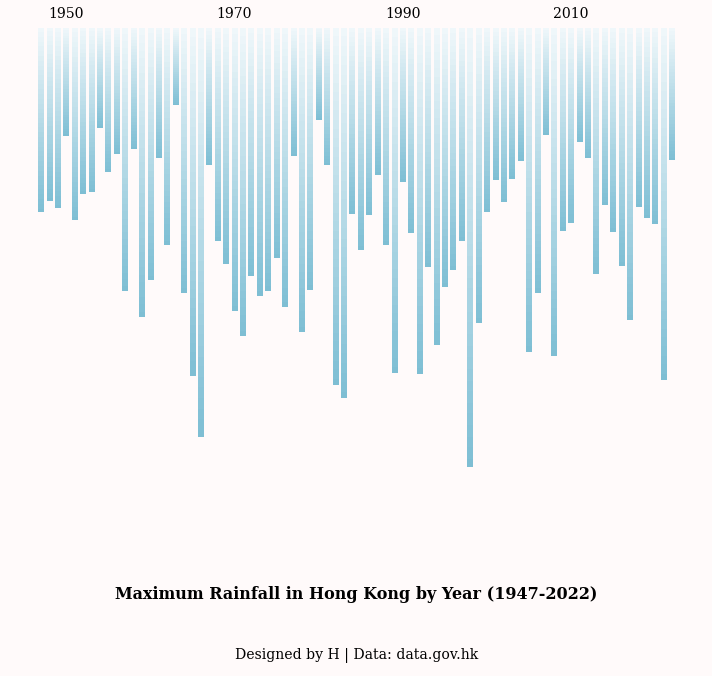

In [13]:
# Create figure
fig = plt.figure(figsize=(10, 10), facecolor='snow', tight_layout=True)
# Assign axes to ax
ax = plt.gca()

# Set facecolor of ax
ax.set_facecolor('snow')

# Plot bars
bars = ax.bar(df.index, df['Value'], width=.65, color='none')

# Define new cmap based on 'ocean' cmap
color = ListedColormap(get_cmap('ocean')(np.linspace(.83, .98, 256)))

# Create linspace, and make it 2d
grad = np.atleast_2d(np.linspace(0,1,256)).T

# Loop through all bars
for bar in bars:
    
    # Get xpos, ypos, width, and height of bar
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    
    # Plot `grad` linspace as image, i.e. applying gradient
    # Set aspect to auto, keep the axis fixed
    ax.imshow(grad, extent=(x, x+w, y, y+h), cmap=color, aspect='auto')

# Set ylim and xlim
ax.set_ylim(600, 0)
ax.set_xlim(1943, 2026)

# Set xticks
ax.set_xticks([i for i in range(1950, 2021, 20)])

# Move xaxis to the top
ax.xaxis.tick_top()

# Remove ticks and ytick labels
ax.tick_params(axis='both', left=False, top=False, labelleft=False, labelsize=14)

# Turn off all borders
for a in ax.spines.values():
    a.set_visible(False)

# Add title
ax.set_title('Maximum Rainfall in Hong Kong by Year (1947-2022)', y=0.1, fontsize=16, fontweight='bold')

# Reference data
ax.text(0.5, 0.08, 'Designed by H | Data: data.gov.hk', 
        fontsize=14, transform=fig.transFigure, horizontalalignment='center')

In [14]:
# Save fig
fig.savefig('rainfall', dpi=300, bbox_inches='tight')